# **Machine Learning Analysis**

**Author:** Aanandya Mittal  
**Date:** 2/22/2024

[**Link to ML Project Repository** ](https://github.com/AanandyaMittal/datafun-07-ml)

### **Purpose:**

The purpose of this project is to perform three different analysis of data based around creating a line.  

The 3 techniques used were:
- Charting a Line
- SImple Linear Regression
- Scikit-learn estimator

### **Import**

In [1]:
import pandas as pd
from scipy import stats
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.datasets import fetch_california_housing
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

## **Chart a Straight Line**

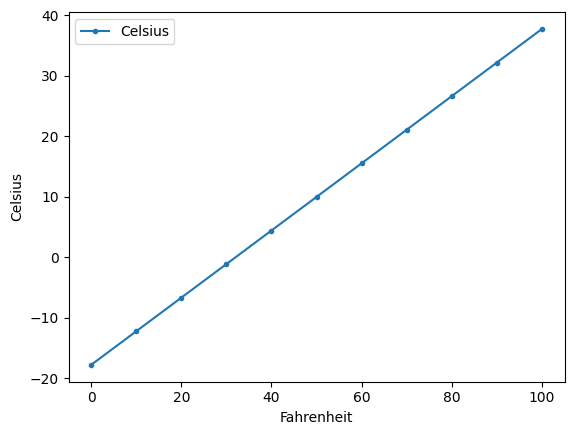

In [2]:
c = lambda f: 5/9*(f-32)
temps = [(f,c(f)) for f in range(0,101,10)]

temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')

## **Predict Avg High Temp in NYC in January**

### **Data Acquisition**

In [3]:
nyc_df = pd.read_csv('ave_hi_nyc_jan_1895_2018.csv')

### **Data Inspection**

In [4]:
print(nyc_df.head())

     Date  Value  Anomaly
0  189501   34.2     -2.4
1  189601   33.2     -3.4
2  189701   34.0     -2.6
3  189801   38.5      1.9
4  189901   34.9     -1.7


In [5]:
print(nyc_df.tail())

       Date  Value  Anomaly
119  201401   35.5     -1.1
120  201501   36.1     -0.5
121  201601   40.8      4.2
122  201701   42.8      6.2
123  201801   38.7      2.1


### **Data Cleaning**

In [6]:
nyc_df.columns = ['Date', 'Temperature', 'Anomaly']
nyc_df.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-2.4
1,189601,33.2,-3.4
2,189701,34.0,-2.6


In [7]:
nyc_df.Date.dtype

dtype('int64')

In [8]:
nyc_df.Date = nyc_df.Date.floordiv(100)
nyc_df.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-2.4
1,1896,33.2,-3.4
2,1897,34.0,-2.6


### **Descriptive Statistics**

In [9]:
pd.set_option('display.precision', 2)

print(nyc_df.Temperature.describe())

count    124.00
mean      36.88
std        4.59
min       25.50
25%       33.83
50%       36.65
75%       39.82
max       47.60
Name: Temperature, dtype: float64


### **Build the Model**

In [10]:
linear_regression = stats.linregress(x=nyc_df.Date, y=nyc_df.Temperature)

print(f'Slope: {linear_regression.slope}')
print(f'Intercept: {linear_regression.intercept}')

Slope: 0.02766136900078678
Intercept: -17.23882328874901


### **Predict**

In [11]:
avg_high = linear_regression.slope * 2024 + linear_regression.intercept
print(f'Average high temperature in January 2024: {avg_high}')

Average high temperature in January 2024: 38.74778756884343


### **Visualizations**

Text(0.5, 1.0, 'Average high temperature in January in NYC')

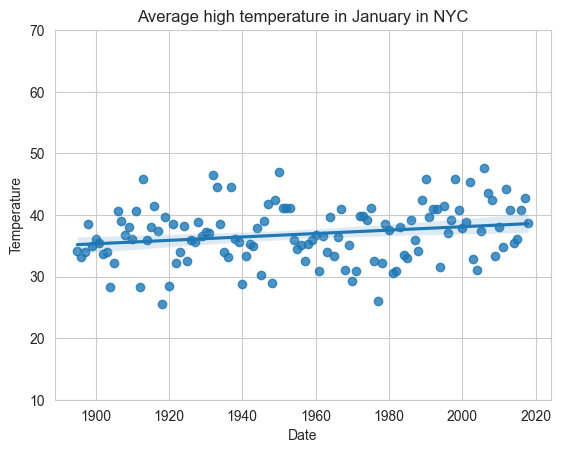

In [12]:
sns.set_style('whitegrid')
axes = sns.regplot(x=nyc_df.Date, y=nyc_df.Temperature)
axes.set_ylim(10,70)
axes.set_title('Average high temperature in January in NYC')

## **Predict Avg High Temp in NYC in January (Cont.)**

### **Build the Model**

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    nyc_df.Date.values.reshape(-1, 1), nyc_df.Temperature.values, random_state=11
)
X_train.shape

(93, 1)

In [14]:
X_test.shape

(31, 1)

In [15]:
linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

In [16]:
print(f'Slope: {linear_regression.coef_}')
print(f'Intercept: {linear_regression.intercept_}')

Slope: [0.0335252]
Intercept: -28.709285569695517


### **Test the Model**

In [17]:
predicted = linear_regression.predict(X_test)

expected = y_test

for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.27, expected: 31.10
predicted: 38.71, expected: 34.80
predicted: 35.79, expected: 38.20
predicted: 36.23, expected: 44.50
predicted: 37.60, expected: 32.20
predicted: 36.90, expected: 32.60
predicted: 35.69, expected: 38.60


### **Predict**

In [18]:
predict = (lambda x: linear_regression.coef_ * x + 
                     linear_regression.intercept_)

print(f'Average high temperature in January 2024: {predict(2024)}')

Average high temperature in January 2024: [39.14571798]


### **Visualizations**

Text(0.5, 1.0, 'Average high temperature in January in NYC')

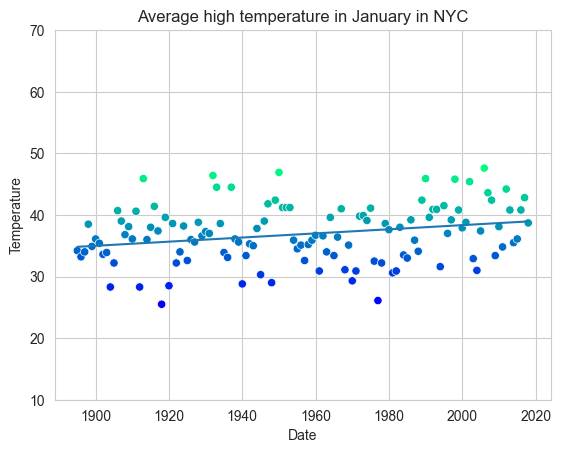

In [19]:
axes = sns.scatterplot(data=nyc_df, x='Date', y='Temperature',
                       hue='Temperature', palette='winter', legend=False)
axes.set_ylim(10,70)

x = np.array([min(nyc_df.Date.values), max(nyc_df.Date.values)])
y = predict(x)
line = plt.plot(x, y)
axes.set_title('Average high temperature in January in NYC')

## **Additional Insights**

The two methods used for the analyzing the "Average High temperature in January in NYC" dataset were Simple Linear Regression and Scikit-learn estimator.

**Simple Linear Regression** is a method that uses the equation y=mx+b to show a trend in the data. After determining this trend we can implement other values for whatever independent veriable we are trying to predict for and insert the value into the equation to determine what the value of the dependent variable will be in that situation. In this example, our independent variable is date and our dependent variable is the avergage high temperature in NYC for that date. This a very straightforward and classic mathematical method for prediction.

**Scikit-learn** is a tool that uses programming in order to build a wide variety of models and the LinearRegression estimator is one of those models. Although this tool takes a little bit of set up, the biggest difference is that the set u can easily be used for any other machine learning models. This comes in handy when doing multiple linear regression, as there are a lot more coefficients to keep track of. Scikit learn also allows for *greater* tailoring of the model's parameters.

Using Simple Linear Regression, I found the average high temperature in January 2024 to be 38.75 whereas with Scikit-learn I found 39.15. This shows that these processes are indeed different and can result in slightly different results. Both are highly effective tools, but due to easier ability to perform compex analyses, it is usually preferred over Simple Linear Regression.